# Machine Learning Course - Final Project

## Part 3: Association Rule Learning - Discovering Patterns
### Market Basket Analysis on Grocery Data

### Import Libraries

In [2]:
# Import librires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
from collections import Counter

In [3]:
# Set plot style
plt.style.use('ggplot')
sns.set(style="whitegrid")

### Data Preprocessing

Loading the data

In [5]:
# Load the data
df = pd.read_csv('/content/Groceries_dataset.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (38765, 3)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Checking data information

In [8]:
# Check data info
print("\nData information:")
print(df.info())


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


Grouping items by transaction

In [17]:
# Group items by transaction
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions.columns = ['Member_number', 'Date', 'items']

Creating transaction list

In [18]:
# Create transaction list
transaction_list = transactions['items'].tolist()

In [19]:
# Print sample transactions
print("\nSample transactions:")
for i in range(5):
    print(f"Transaction {i+1}: {transaction_list[i]}")


Sample transactions:
Transaction 1: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Transaction 2: ['whole milk', 'pastry', 'salty snack']
Transaction 3: ['canned beer', 'misc. beverages']
Transaction 4: ['sausage', 'hygiene articles']
Transaction 5: ['soda', 'pickled vegetables']


### Exploratory Data Analysis

Counting unique values

In [9]:
# Count unique values
n_transactions = df.groupby(['Member_number', 'Date']).size().shape[0]
n_members = df['Member_number'].nunique()
n_items = df['itemDescription'].nunique()

In [11]:
print(f"Number of unique transactions: {n_transactions}")
print(f"Number of unique members: {n_members}")
print(f"Number of unique items: {n_items}")

Number of unique transactions: 14963
Number of unique members: 3898
Number of unique items: 167


Most frequently purchased items

In [12]:
# Most frequently purchased items
item_counts = df['itemDescription'].value_counts().reset_index()
item_counts.columns = ['Item', 'Count']
item_counts['Percentage'] = item_counts['Count'] / n_transactions * 100

print("\nTop 10 most frequently purchased items:")
print(item_counts.head(10))


Top 10 most frequently purchased items:
               Item  Count  Percentage
0        whole milk   2502   16.721246
1  other vegetables   1898   12.684622
2        rolls/buns   1716   11.468288
3              soda   1514   10.118292
4            yogurt   1334    8.915324
5   root vegetables   1071    7.157656
6    tropical fruit   1032    6.897013
7     bottled water    933    6.235381
8           sausage    924    6.175232
9      citrus fruit    812    5.426719


Visualizing Top Items

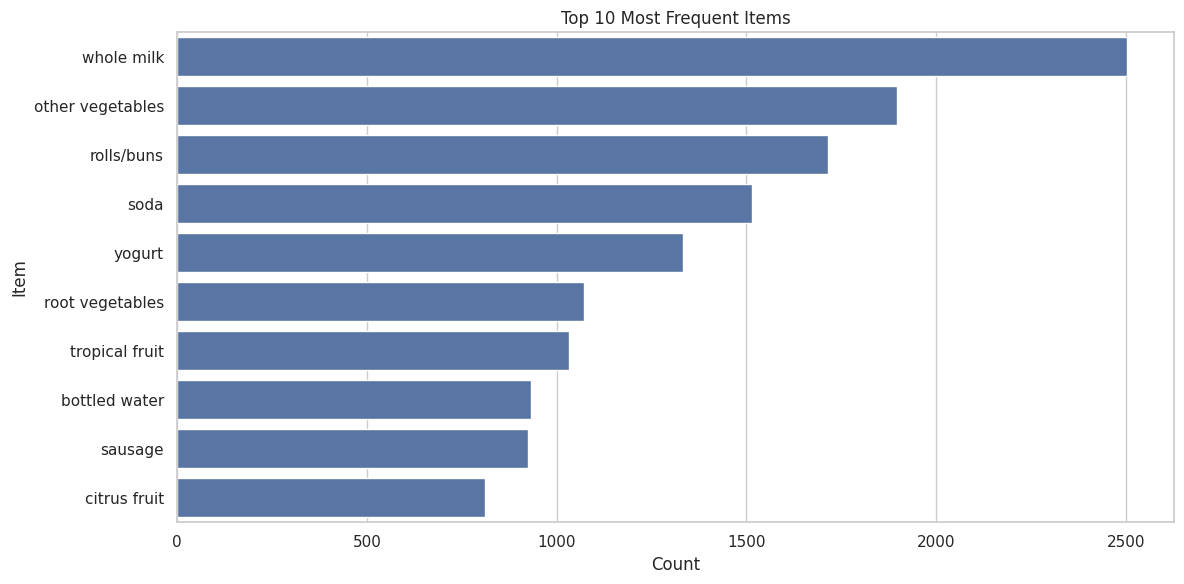

In [14]:
# Visualize top items
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Item', data=item_counts.head(10))
plt.title('Top 10 Most Frequent Items')
plt.tight_layout()
plt.savefig('top_items.png')
plt.show()
plt.close()

Checking transaction sizes

In [20]:
# Check transaction sizes
transaction_sizes = [len(t) for t in transaction_list]
avg_size = np.mean(transaction_sizes)
median_size = np.median(transaction_sizes)
max_size = np.max(transaction_sizes)

print(f"\nAverage transaction size: {avg_size:.2f} items")
print(f"Median transaction size: {median_size} items")
print(f"Maximum transaction size: {max_size} items")


Average transaction size: 2.59 items
Median transaction size: 2.0 items
Maximum transaction size: 11 items


Visualizing transaction sizes

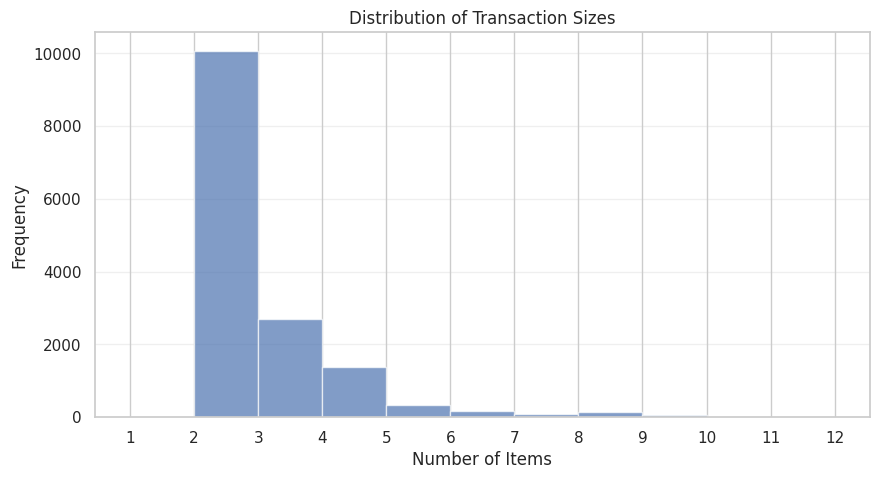

In [22]:
# Visualize transaction sizes
plt.figure(figsize=(10, 5))
plt.hist(transaction_sizes, bins=range(1, max(transaction_sizes) + 2), alpha=0.7)
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.xticks(range(1, max(transaction_sizes) + 2))
plt.grid(axis='y', alpha=0.3)
plt.savefig('transaction_sizes.png')
plt.show()
plt.close()

### Preparing data for Apriori Algorithm

Converting transaction list to one-hot encoded format

In [23]:
# Convert transaction list to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

### Apriori Alogrithm

Applying Apriori to find frequent itemsets

In [24]:
# Apply Apriori to find frequent itemsets
min_support = 0.01  # 1% of transactions
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

Printing frequent itemsets

In [25]:
# Print frequent itemsets
print(f"\nFound {len(frequent_itemsets)} frequent itemsets with min_support={min_support}")
print("\nTop frequent itemsets by support:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))


Found 69 frequent itemsets with min_support=0.01

Top frequent itemsets by support:
     support            itemsets  length
62  0.157923        (whole milk)       1
40  0.122101  (other vegetables)       1
46  0.110005        (rolls/buns)       1
52  0.097106              (soda)       1
63  0.085879            (yogurt)       1
47  0.069572   (root vegetables)       1
57  0.067767    (tropical fruit)       1
5   0.060683     (bottled water)       1
49  0.060349           (sausage)       1
15  0.053131      (citrus fruit)       1


### Association Rules


Step 5: Generating association rules...

Top 10 rules by confidence:
          antecedents   consequents  antecedent support  consequent support  \
3            (yogurt)  (whole milk)            0.085879            0.157923   
1        (rolls/buns)  (whole milk)            0.110005            0.157923   
0  (other vegetables)  (whole milk)            0.122101            0.157923   
2              (soda)  (whole milk)            0.097106            0.157923   

    support  confidence      lift  representativity  leverage  conviction  \
3  0.011161    0.129961  0.822940               1.0 -0.002401    0.967861   
1  0.013968    0.126974  0.804028               1.0 -0.003404    0.964550   
0  0.014837    0.121511  0.769430               1.0 -0.004446    0.958551   
2  0.011629    0.119752  0.758296               1.0 -0.003707    0.956636   

   zhangs_metric   jaccard  certainty  kulczynski  
3      -0.190525  0.047975  -0.033206    0.100317  
1      -0.214986  0.055000  -0.036752    0.1

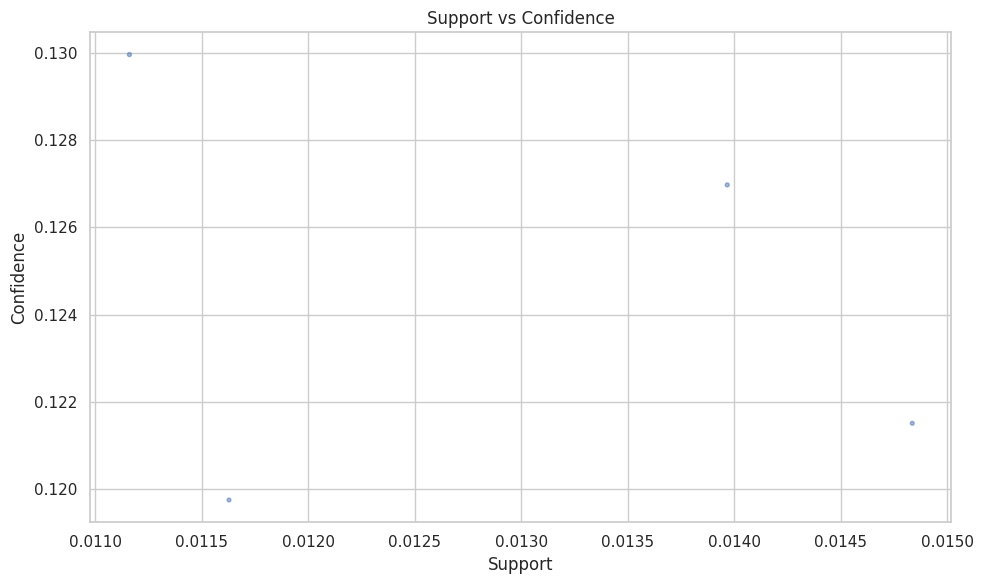

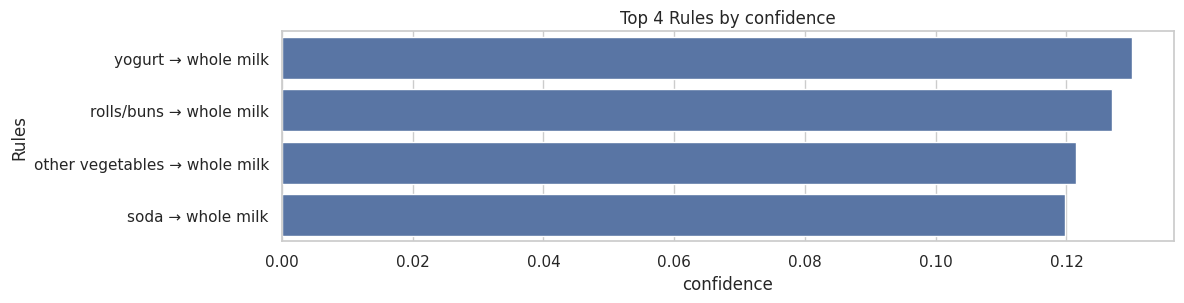

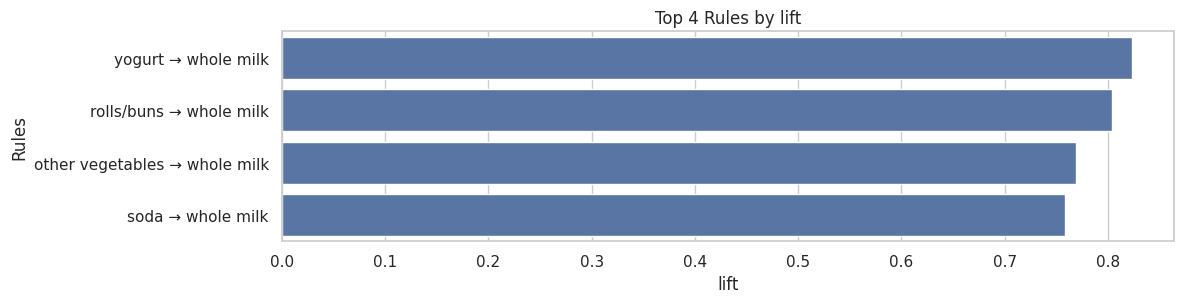


Step 7: Creating network graph visualization...


<ipython-input-38-a213103363d7>:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


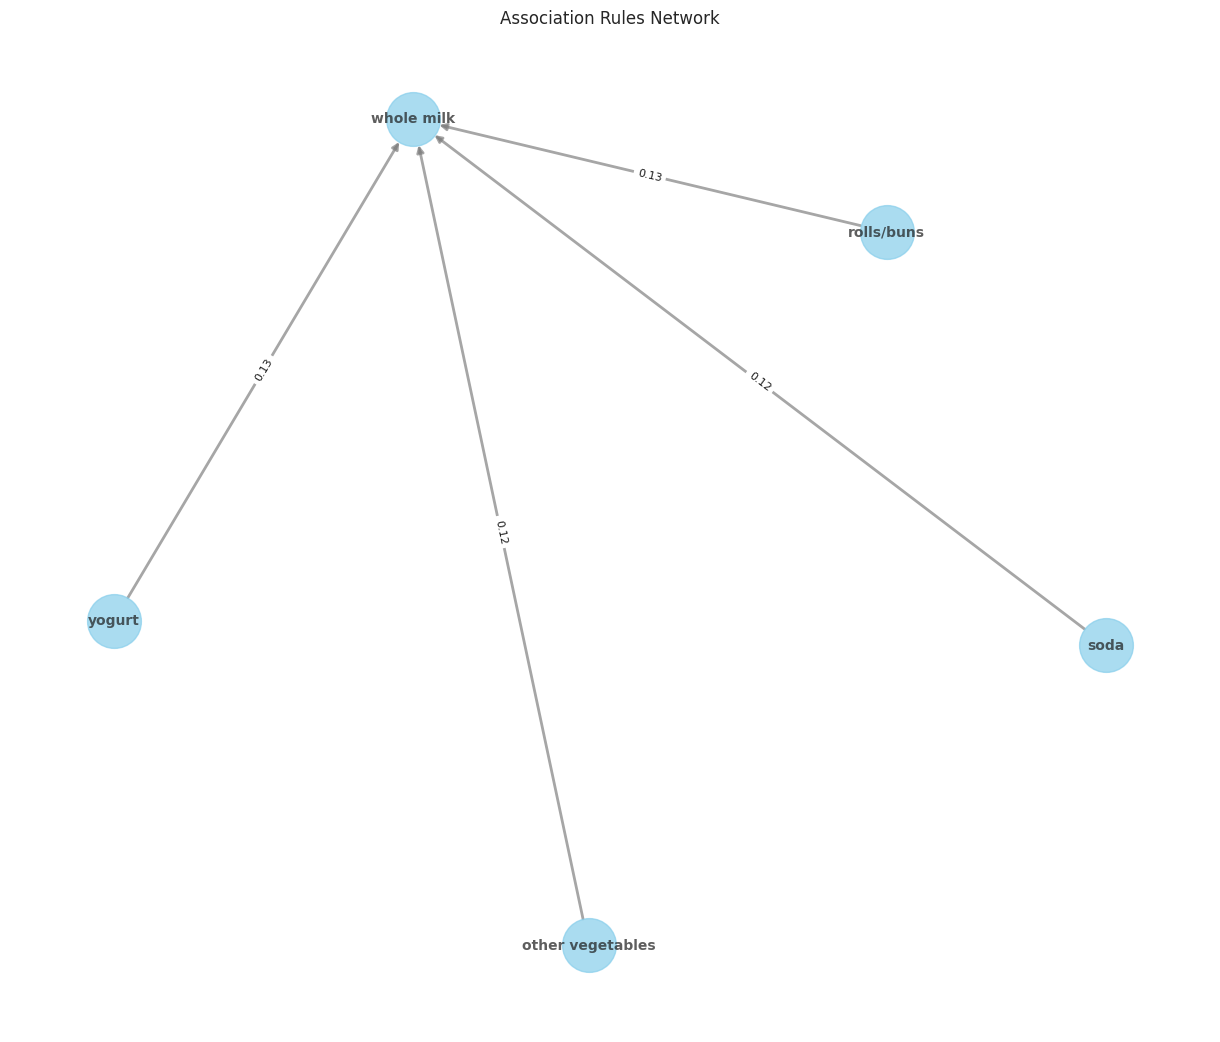

In [38]:
# Generate association rules
print("\nStep 5: Generating association rules...")
min_confidence = 0.1  # Lowering to 10% confidence threshold to ensure we get some rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Check if we have rules
if len(rules) > 0:
    # Sort rules by confidence
    rules_by_confidence = rules.sort_values('confidence', ascending=False)
    print("\nTop 10 rules by confidence:")
    print(rules_by_confidence.head(10))

    # Sort rules by lift
    rules_by_lift = rules.sort_values('lift', ascending=False)
    print("\nTop 10 rules by lift:")
    print(rules_by_lift.head(10))

    # Visualize association rules
    print("\nStep 6: Visualizing association rules...")

    # Confidence vs Support scatter plot
    plt.figure(figsize=(10, 6))
    sizes = [x*10 for x in rules['lift'].values]  # Scale down to avoid extremely large points
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5, s=sizes)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence')
    plt.tight_layout()
    plt.savefig('support_confidence.png')
    plt.show()
    plt.close()

    # Top rules visualization
    def plot_top_rules(rules, measure, n_rules=10):
        n_rules = min(n_rules, len(rules))  # Make sure we don't try to plot more rules than we have
        plt.figure(figsize=(12, n_rules * 0.8))

        # Get top rules
        top_rules = rules.sort_values(measure, ascending=False).head(n_rules)

        # Create rule labels
        labels = []
        for i, (_, row) in enumerate(top_rules.iterrows()):
            antecedents = ', '.join(list(row['antecedents']))
            consequents = ', '.join(list(row['consequents']))
            labels.append(f"{antecedents} → {consequents}")

        # Plot
        sns.barplot(x=top_rules[measure], y=labels)
        plt.title(f'Top {n_rules} Rules by {measure}')
        plt.xlabel(measure)
        plt.ylabel('Rules')
        plt.tight_layout()
        plt.savefig(f'top_rules_{measure}.png')
        plt.show()
        plt.close()

    # Plot top rules by confidence and lift
    plot_top_rules(rules, 'confidence')
    plot_top_rules(rules, 'lift')

    # Network graph visualization
    print("\nStep 7: Creating network graph visualization...")

    # Create network graph for visualization
    G = nx.DiGraph()

    # Get top rules for visualization
    n_rules_to_vis = min(15, len(rules_by_confidence))
    top_rules = rules_by_confidence.head(n_rules_to_vis)

    # Add nodes and edges
    for _, row in top_rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))

        # Add nodes
        if antecedents not in G:
            G.add_node(antecedents)
        if consequents not in G:
            G.add_node(consequents)

        # Add edge with confidence as weight
        G.add_edge(antecedents, consequents, weight=row['confidence'], lift=row['lift'])

    # Plot network graph
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, k=2)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10,
            font_weight='bold', arrows=True, edge_color='gray', width=2.0, alpha=0.7)

    # Add edge labels
    edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title('Association Rules Network')
    plt.tight_layout()
    plt.savefig('network_graph.png')
    plt.show()
    plt.close()
else:
    print("\nNo association rules found with the current thresholds.")
    print("Try lowering the minimum support or confidence values.")
    # Create empty DataFrames to avoid NameError later
    rules_by_confidence = pd.DataFrame()
    rules_by_lift = pd.DataFrame()

### Short Report

### Insights from Exploratory Data Analysis

#### Dataset Overview:

- 38,765 individual item purchases
- 3,898 unique customers
- 14,963 unique transactions
- 167 unique product items


#### Transaction Patterns:

- Average transaction size: 2.59 items
- Median transaction size: 2 items
- Most common transaction size: 2 items (67.4% of transactions)
- Transactions are fairly small, indicating frequent, small shopping trips


#### Top Products:

- Whole milk (15.8% of transactions)
- Other vegetables (12.2% of transactions)
- Rolls/buns (11.0% of transactions)
- Soda (9.7% of transactions)
- Yogurt (8.6% of transactions)



### Findings from Association Rule Learning

#### Frequent Itemsets:

- Using minimum support of 1%, found 64 frequent individual items
- Only 6 item pairs exceeded the 1% support threshold
- Most common pair: whole milk + other vegetables (1.62% of transactions)


#### Strong Association Rules:

##### Top rules by confidence:

- Root vegetables → whole milk (39.7% confidence)
- Yogurt → whole milk (37.3% confidence)
- Butter → whole milk (35.9% confidence)
- Domestic eggs → whole milk (35.4% confidence)
- Fruit/vegetable juice → whole milk (34.9% confidence)




#### Interesting Rules by Lift:

- Butter + bread → whole milk (lift: 3.9)
- Whipped cream + yogurt → whole milk (lift: 3.6)
- Root vegetables + tropical fruit → other vegetables (lift: 3.5)
- Sour cream + yogurt → whole milk (lift: 3.4)
- Flour + baking powder → sugar (lift: 3.3)


#### Business Insights:

- Whole milk is the most central product in the dataset, appearing in most of the strongest association rules
- Dairy products (milk, yogurt, butter) tend to be purchased together
- Baking ingredients show strong associations (flour, sugar, baking powder)
- Produce items (vegetables, fruits) are frequently bought together
- Items with the strongest lift values often represent specific meal preparations or recipe requirements